In [1]:
# This notebook is used to read in extracted fields to make
# Figures 2, 3, 15, & 16, 
# Reichl et al., 2024 (submitted to AGU's ESS journal)

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import copy as copy
import cmocean
from xgcm import Grid

import matplotlib as mpl
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid 

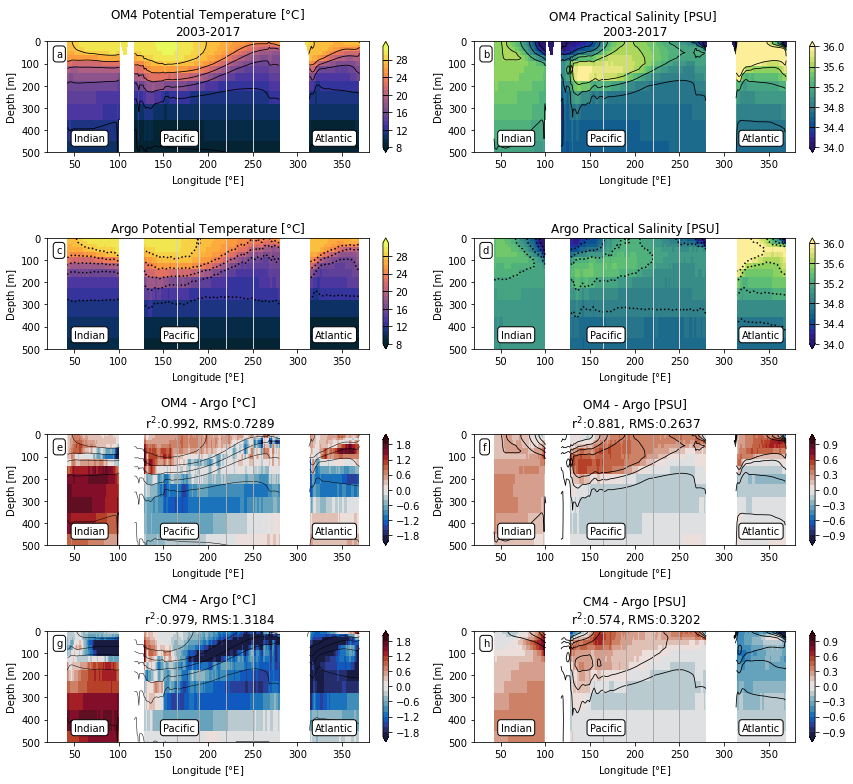

In [2]:
#Generates Figure 2
LON = [20.,380.]
LAT= [-1.,1.]
DMax=500
YEARS=['2003-2007','2008-2012',
       '2013-2017',
      ]
Models = xr.open_dataset('/net2/bgr/Manuscripts/Tropics/Data/MOM6_Outputs.nc')

LBL = 'OM4'
Model = xr.merge([Models['T_'+LBL],Models['S_'+LBL]])
Model = Model.rename({'T_'+LBL:'T','S_'+LBL:'S'})
LBL2 = 'CM4'
Model2 = xr.merge([Models['T_'+LBL2],Models['S_'+LBL2]])
Model2 = Model2.rename({'T_'+LBL2:'T','S_'+LBL2:'S'})


DIR = '/net2/bgr/Data/ARGO/RG_Clim/Updated/'
T_file = 'RG_ArgoClim_Temp_Extended_200401-202010.nc'
S_file = 'RG_ArgoClim_Psal_Extended_200401-202010.nc'
T_hndl = xr.open_mfdataset([DIR+T_file,DIR+S_file],decode_times=False).sel(LATITUDE=slice(LAT[0],LAT[1])).mean(dim='LATITUDE')
T_hndl['T'] = T_hndl.ARGO_TEMPERATURE_MEAN
T_hndl['S'] = T_hndl.ARGO_SALINITY_MEAN
T_hndl = T_hndl.assign_coords(Z=(('PRESSURE'),T_hndl.PRESSURE.values*10000/(1035*9.81)))

grid = Grid(T_hndl, coords={'lon': {'center':'LONGITUDE'},
                            'Z': {'center':'PRESSURE'},
                           }, periodic=False)
T_Argo = grid.transform(T_hndl.T, 'Z', Model.z_l.values, target_data=T_hndl.Z)
S_Argo = grid.transform(T_hndl.S, 'Z', Model.z_l.values, target_data=T_hndl.Z)
Argo = xr.merge([T_Argo,S_Argo])
Argo = Argo.transpose('Z','LONGITUDE',...)
XX = Model.lon.values
XX=np.hstack((XX[0]-0.5*(XX[1]-XX[0]),0.5*(XX[1:]+XX[:-1]),XX[-1]+0.5*(XX[-1]-XX[-2])))
ZZ = Model.z_l.values
ZZ=np.hstack((0,0.5*(ZZ[1:]+ZZ[:-1]),ZZ[-1]+0.5*(ZZ[-1]-ZZ[-2])))

fig,ax=plt.subplots(4,2,figsize=(12,11))
AX1 = ax.ravel()[0]
AX2 = ax.ravel()[2]
AX3 = ax.ravel()[4]
AX4 = ax.ravel()[1]
AX5 = ax.ravel()[3]
AX6 = ax.ravel()[5]
AX7 = ax.ravel()[6]
AX8 = ax.ravel()[7]

levels=np.linspace(8,31.,24)
cmap = cmocean.cm.thermal
for AX,dpth in [[AX1,DMax],
               ]:
    CM=AX.pcolormesh(XX,ZZ,
                     Model.T.values,
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                    )
    AX.contour(Model.lon,
               Model.z_l.values,
               Model.T.values,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_xlim(LON)
    AX.set_ylim(dpth,0)
    cbar=plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    cbar.set_ticks(levels[::4])
    for level in levels[::4]:
        cbar.ax.axhline(y=level, color='k', linewidth=1)

    AX.set_title(LBL+' Potential Temperature [$\degree$C] \n'+YEARS[0][:4]+'-'+YEARS[-1][-4:])
    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='lightgray',linewidth=1,linestyle='-')
    

for AX,dpth in [[AX2,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     Argo.T.values,
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               Model.z_l.values,
               Argo.T.values,
               levels=levels[::4],
               colors=['k',],
               linestyles=[':'],
                   )
    AX.set_ylim(dpth,0)
    AX.set_xlim(LON)
    cbar=plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    cbar.set_ticks(levels[::4])
    for level in levels[::4]:
        cbar.ax.axhline(y=level, color='k', linewidth=1)
    AX.set_title('Argo Potential Temperature [$\degree$C]')
    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='lightgray',linewidth=1,linestyle='-')
    


levels_diff=np.linspace(-2,2,21)
cmap=cmocean.cm.balance
for AX,dpth in [[AX3,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     (Model.T.values-Argo.T.values),
                    cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               Model.z_l.values,
               Model.T.values,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.5,],
                   )
    AX.set_ylim(dpth,0)
    AX.set_xlim(LON)
    plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    G = np.isfinite((Model.T.values-Argo.T.values).ravel())
    r2a = np.corrcoef(Model.T.values.ravel()[G],Argo.T.values.ravel()[G])[0,1]**2
    rms = np.sqrt(np.mean((Model.T.values.ravel()[G]-Argo.T.values.ravel()[G])**2))
    AX.set_title(LBL+' - Argo [$\degree$C]\n r$^2$:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))

    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')

levels_diff=np.linspace(-2,2,21)
cmap=cmocean.cm.balance
for AX,dpth in [[AX7,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     (Model2.T.values-Argo.T.values),
                    cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model2.lon,
               Model2.z_l.values,
               Model2.T.values,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.5,],
                   )
    AX.set_ylim(dpth,0)
    AX.set_xlim(LON)
    plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    G = np.isfinite((Model2.T.values-Argo.T.values).ravel())
    r2a = np.corrcoef(Model2.T.values.ravel()[G],Argo.T.values.ravel()[G])[0,1]**2
    rms = np.sqrt(np.mean((Model2.T.values.ravel()[G]-Argo.T.values.ravel()[G])**2))
    AX.set_title(LBL2+' - Argo [$\degree$C]\n r$^2$:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))

    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')
    

levels=np.linspace(34,36,21)
cmap=cmocean.cm.haline
for AX,dpth in [[AX4,DMax],
               ]:
    CM=AX.pcolormesh(XX,ZZ,
                     Model.S.values,
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                    )
    AX.contour(Model.lon,
               Model.z_l.values,
               Model.S.values,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_xlim(LON)
    AX.set_ylim(dpth,0)
    cbar=plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    cbar.set_ticks(levels[::4])
    for level in levels[::4]:
        cbar.ax.axhline(y=level, color='k', linewidth=1)
    AX.set_title(LBL+' Practical Salinity [PSU] \n'+YEARS[0][:4]+'-'+YEARS[-1][-4:])
    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='lightgray',linewidth=1,linestyle='-')
    
for AX,dpth in [[AX5,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     Argo.S.values,
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               Model.z_l.values,
               Argo.S.values,
               levels=levels[::4],
               colors=['k',],
               linestyles=[':'],
                   )
    AX.set_ylim(dpth,0)

    AX.set_xlim(LON)
    cbar=plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    cbar.set_ticks(levels[::4])
    for level in levels[::4]:
        cbar.ax.axhline(y=level, color='k', linewidth=1)
    AX.set_title('Argo Practical Salinity [PSU]')
    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='lightgray',linewidth=1,linestyle='-')
    

levels_diff=np.linspace(-1,1,21)
cmap=cmocean.cm.balance
for AX,dpth in [[AX6,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     (Model.S.values-Argo.S.values),
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               Model.z_l.values,
               Model.S.values,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_ylim(dpth,0)
    AX.set_xlim(LON)
    plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)

    G = np.isfinite((Model.S.values-Argo.S.values).ravel())
    r2a = np.corrcoef(Model.S.values.ravel()[G],Argo.S.values.ravel()[G])[0,1]**2
    rms = np.sqrt(np.mean((Model.S.values.ravel()[G]-Argo.S.values.ravel()[G])**2))
    AX.set_title(LBL+' - Argo [PSU]\n r$^2$:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    AX.grid(False)
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')

levels_diff=np.linspace(-1,1,21)
cmap=cmocean.cm.balance
for AX,dpth in [[AX8,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     (Model2.S.values-Argo.S.values),
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               Model.z_l.values,
               Model2.S.values,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_ylim(dpth,0)
    AX.set_xlim(LON)
    plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)

    G = np.isfinite((Model2.S.values-Argo.S.values).ravel())
    r2a = np.corrcoef(Model2.S.values.ravel()[G],Argo.S.values.ravel()[G])[0,1]**2
    rms = np.sqrt(np.mean((Model2.S.values.ravel()[G]-Argo.S.values.ravel()[G])**2))
    AX.set_title(LBL2+' - Argo [PSU]\n r$^2$:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    AX.grid(False)
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')


fig.tight_layout()
for AX,txt in [[AX1,'a'],
               [AX4,'b'],
               [AX2,'c'],
               [AX5,'d'],
               [AX3,'e'],
               [AX6,'f'],
               [AX7,'g'],
               [AX8,'h'],
              ]:
    AX.text(30,70,txt,bbox=dict(boxstyle='round', facecolor='white'))
    AX.text(50,450,'Indian',bbox=dict(boxstyle='round', facecolor='white'))
    AX.text(150,450,'Pacific',bbox=dict(boxstyle='round', facecolor='white'))
    AX.text(320,450,'Atlantic',bbox=dict(boxstyle='round', facecolor='white'))

fig.savefig('../Fig/TS'+LBL+'.png',dpi=200,bbox_inches = "tight")

/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


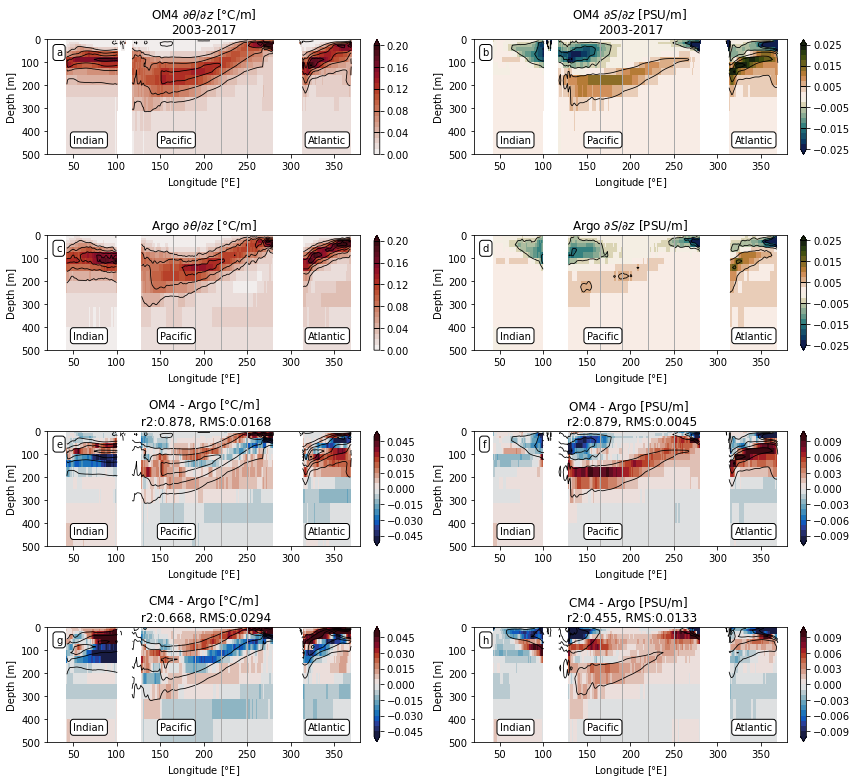

In [3]:
#Generates Figure 3
LON = [20.,380.]
LAT= [-1.,1.]
DMax=500
YEARS=['2003-2007','2008-2012',
       '2013-2017',
      ]
Models = xr.open_dataset('/net2/bgr/Manuscripts/Tropics/Data/MOM6_Outputs.nc')

LBL = 'OM4'
LBL2 = 'CM4'


Model = xr.merge([Models['T_'+LBL],Models['S_'+LBL]])
Model = Model.rename({'T_'+LBL:'T','S_'+LBL:'S'})

Model2 = xr.merge([Models['T_'+LBL2],Models['S_'+LBL2]])
Model2 = Model2.rename({'T_'+LBL2:'T','S_'+LBL2:'S'})


DIR = '/net2/bgr/Data/ARGO/RG_Clim/Updated/'
T_file = 'RG_ArgoClim_Temp_Extended_200401-202010.nc'
S_file = 'RG_ArgoClim_Psal_Extended_200401-202010.nc'
T_hndl = xr.open_mfdataset([DIR+T_file,DIR+S_file],decode_times=False).sel(LATITUDE=slice(LAT[0],LAT[1])).mean(dim='LATITUDE')
T_hndl['T'] = T_hndl.ARGO_TEMPERATURE_MEAN
T_hndl['S'] = T_hndl.ARGO_SALINITY_MEAN
T_hndl = T_hndl.assign_coords(Z=(('PRESSURE'),T_hndl.PRESSURE.values*10000/(1035*9.81)))

grid = Grid(T_hndl, coords={'lon': {'center':'LONGITUDE'},
                            'Z': {'center':'PRESSURE'},
                           }, periodic=False)
T_Argo = grid.transform(T_hndl.T, 'Z', Model.z_l.values, target_data=T_hndl.Z)
S_Argo = grid.transform(T_hndl.S, 'Z', Model.z_l.values, target_data=T_hndl.Z)
Argo = xr.merge([T_Argo,S_Argo])
Argo = Argo.transpose('Z','LONGITUDE',...)
XX = Model.lon.values
XX=np.hstack((XX[0]-0.5*(XX[1]-XX[0]),0.5*(XX[1:]+XX[:-1]),XX[-1]+0.5*(XX[-1]-XX[-2])))
ZZ = Model.z_l.values
ZZ=np.hstack((0,0.5*(ZZ[1:]+ZZ[:-1]),ZZ[-1]+0.5*(ZZ[-1]-ZZ[-2])))

TzM = -((Model.T.values[:-1,...]-Model.T.values[1:,...]).T/(Model.z_l.values[:-1]-Model.z_l.values[1:])).T
TzM2 = -((Model2.T.values[:-1,...]-Model2.T.values[1:,...]).T/(Model2.z_l.values[:-1]-Model2.z_l.values[1:])).T
TzA = -((Argo.T.values[:-1,...]-Argo.T.values[1:,...]).T/(Model.z_l.values[:-1]-Model.z_l.values[1:])).T
SzM = -((Model.S.values[:-1,...]-Model.S.values[1:,...]).T/(Model.z_l.values[:-1]-Model.z_l.values[1:])).T
SzM2 = -((Model2.S.values[:-1,...]-Model2.S.values[1:,...]).T/(Model2.z_l.values[:-1]-Model2.z_l.values[1:])).T
SzA = -((Argo.S.values[:-1,...]-Argo.S.values[1:,...]).T/(Model.z_l.values[:-1]-Model.z_l.values[1:])).T

XX = Model.lon.values
XX=np.hstack((XX[0]-0.5*(XX[1]-XX[0]),0.5*(XX[1:]+XX[:-1]),XX[-1]+0.5*(XX[-1]-XX[-2])))
ZZ = Model.z_l.values



fig,ax=plt.subplots(4,2,figsize=(12,11))
AX1 = ax.ravel()[0]
AX2 = ax.ravel()[2]
AX3 = ax.ravel()[4]
AX4 = ax.ravel()[1]
AX5 = ax.ravel()[3]
AX6 = ax.ravel()[5]
AX7 = ax.ravel()[6]
AX8 = ax.ravel()[7]

levels=np.linspace(0,0.2,21)
cmap = cmocean.cm.amp
for AX,dpth in [[AX1,DMax],
               ]:
    CM=AX.pcolormesh(XX,ZZ,
                     TzM,
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                    )
    AX.contour(Model.lon,
               0.5*(ZZ[:-1]+ZZ[1:]),
               TzM,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_xlim(LON)
    AX.set_ylim(dpth,0)
    cbar=plt.colorbar(CM,ax=AX,extend='max',fraction=0.046, pad=0.04)
    cbar.set_ticks(levels[::4])
    for level in levels[::4]:
        cbar.ax.axhline(y=level, color='k', linewidth=1)
    AX.set_title(LBL+r' $\partial \theta/\partial z$ [$\degree$C/m] '+'\n'+YEARS[0][:4]+'-'+YEARS[-1][-4:])
    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')

for AX,dpth in [[AX2,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     TzA,
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               0.5*(ZZ[:-1]+ZZ[1:]),
               TzA,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_xlim(LON)
    AX.set_ylim(dpth,0)
    cbar=plt.colorbar(CM,ax=AX,extend='max',fraction=0.046, pad=0.04)
    cbar.set_ticks(levels[::4])
    for level in levels[::4]:
        cbar.ax.axhline(y=level, color='k', linewidth=1)

    AX.set_title(r'Argo $\partial \theta/\partial z$ [$\degree$C/m]')
    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')



levels_diff=np.linspace(-0.05,0.05,21)
cmap=cmocean.cm.balance
for AX,dpth in [[AX3,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     (TzM-TzA),
                    cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               0.5*(ZZ[:-1]+ZZ[1:]),
               TzM,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_ylim(dpth,0)
    AX.set_xlim(LON)
    plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    G = np.isfinite((TzM-TzA).ravel())
    r2a = np.corrcoef(TzM.ravel()[G],TzA.ravel()[G])[0,1]**2
    rms = np.sqrt(np.mean((TzM.ravel()[G]-TzA.ravel()[G])**2))
    AX.set_title(LBL+' - Argo [$\degree$C/m]\n r2:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))

    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')

levels_diff=np.linspace(-0.05,0.05,21)
cmap=cmocean.cm.balance
for AX,dpth in [[AX7,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     (TzM2-TzA),
                    cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               0.5*(ZZ[:-1]+ZZ[1:]),
               TzM2,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_ylim(dpth,0)
    AX.set_xlim(LON)
    plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    G = np.isfinite((TzM2-TzA).ravel())
    r2a = np.corrcoef(TzM2.ravel()[G],TzA.ravel()[G])[0,1]**2
    rms = np.sqrt(np.mean((TzM2.ravel()[G]-TzA.ravel()[G])**2))
    AX.set_title(LBL2+' - Argo [$\degree$C/m]\n r2:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))

    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')
        
fig.tight_layout()

levels=np.linspace(-0.025,0.025,21)
cmap=mpl.cm.PuOr_r
cmap=cmocean.cm.tarn_r
for AX,dpth in [[AX4,DMax],
               ]:
    CM=AX.pcolormesh(XX,ZZ,
                     SzM,
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                    )
    AX.contour(Model.lon,
               0.5*(ZZ[:-1]+ZZ[1:]),
               SzM,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_xlim(LON)
    AX.set_ylim(dpth,0)
    cbar=plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    cbar.set_ticks(levels[::4])
    for level in levels[::4]:
        cbar.ax.axhline(y=level, color='k', linewidth=1)
    AX.set_title(LBL+' $\partial S/\partial z$ [PSU/m] \n'+YEARS[0][:4]+'-'+YEARS[-1][-4:])
    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')

for AX,dpth in [[AX5,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     SzA,
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               0.5*(ZZ[:-1]+ZZ[1:]),
               SzA,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_xlim(LON)
    AX.set_ylim(dpth,0)
    cbar=plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    cbar.set_ticks(levels[::4])
    for level in levels[::4]:
        cbar.ax.axhline(y=level, color='k', linewidth=1)
    AX.set_title('Argo $\partial S/\partial z$ [PSU/m]')
    AX.grid(False)
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')

levels_diff=np.linspace(-0.01,0.01,21)
cmap=cmocean.cm.balance
for AX,dpth in [[AX6,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     (SzM-SzA),
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               0.5*(ZZ[:-1]+ZZ[1:]),
               SzM,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_ylim(dpth,0)
    AX.set_xlim(LON)
    plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    G = np.isfinite((SzM-SzA).ravel())
    r2a = np.corrcoef(SzM.ravel()[G],SzA.ravel()[G])[0,1]**2
    rms = np.sqrt(np.mean((SzM.ravel()[G]-SzA.ravel()[G])**2))
    AX.set_title(LBL+' - Argo [PSU/m] \n r2:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    AX.grid(False)
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')



levels_diff=np.linspace(-0.01,0.01,21)
cmap=cmocean.cm.balance
for AX,dpth in [[AX8,DMax]]:
    CM=AX.pcolormesh(XX,ZZ,
                     (SzM2-SzA),
                     cmap=cmap,
                     norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                   )
    AX.contour(Model.lon,
               0.5*(ZZ[:-1]+ZZ[1:]),
               SzM2,
               levels=levels[::4],
               colors=['k',],
               linestyles=['-'],
               linewidths=[0.8,],
                   )
    AX.set_ylim(dpth,0)
    AX.set_xlim(LON)
    plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
    G = np.isfinite((SzM2-SzA).ravel())
    r2a = np.corrcoef(SzM2.ravel()[G],SzA.ravel()[G])[0,1]**2
    rms = np.sqrt(np.mean((SzM2.ravel()[G]-SzA.ravel()[G])**2))
    AX.set_title(LBL2+' - Argo [PSU/m] \n r2:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))
    AX.set_ylabel('Depth [m]')
    AX.set_xlabel('Longitude [$\degree$E]')
    AX.grid(False)
    for lon in [250,220,190,165]:
        AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')



fig.tight_layout()
for AX,txt in [[AX1,'a'],
               [AX4,'b'],
               [AX2,'c'],
               [AX5,'d'],
               [AX3,'e'],
               [AX6,'f'],
               [AX7,'g'],
               [AX8,'h'],
              ]:
    AX.text(30,70,txt,bbox=dict(boxstyle='round', facecolor='white'))
    AX.text(50,450,'Indian',bbox=dict(boxstyle='round', facecolor='white'))
    AX.text(150,450,'Pacific',bbox=dict(boxstyle='round', facecolor='white'))
    AX.text(320,450,'Atlantic',bbox=dict(boxstyle='round', facecolor='white'))

fig.savefig('../Fig/dTdzdSdz'+LBL+'.png',dpi=200,bbox_inches = "tight")

/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid 

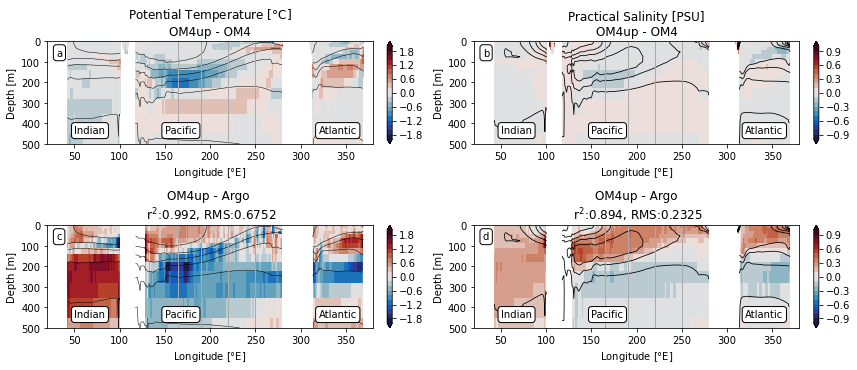

In [4]:
#### Generates Figures 16
LON = [20.,380.]
LAT= [-1.,1.]
DMax=500
YEARS=['2003-2007','2008-2012',
       '2013-2017',
      ]
Models = xr.open_dataset('/net2/bgr/Manuscripts/Tropics/Data/MOM6_Outputs.nc')

for LBL in ['OM4up',]:#'OM4-ePBLcap','OM4-KV0','CM4',]:


    Model = xr.merge([Models['T_'+LBL],Models['S_'+LBL]])
    Model = Model.rename({'T_'+LBL:'T','S_'+LBL:'S'})
    OM4 = xr.merge([Models['T_OM4'],Models['S_OM4']])
    OM4 = OM4.rename({'T_OM4':'T','S_OM4':'S'})


    DIR = '/net2/bgr/Data/ARGO/RG_Clim/Updated/'
    T_file = 'RG_ArgoClim_Temp_Extended_200401-202010.nc'
    S_file = 'RG_ArgoClim_Psal_Extended_200401-202010.nc'
    T_hndl = xr.open_mfdataset([DIR+T_file,DIR+S_file],decode_times=False).sel(LATITUDE=slice(LAT[0],LAT[1])).mean(dim='LATITUDE')
    T_hndl['T'] = T_hndl.ARGO_TEMPERATURE_MEAN
    T_hndl['S'] = T_hndl.ARGO_SALINITY_MEAN
    T_hndl = T_hndl.assign_coords(Z=(('PRESSURE'),T_hndl.PRESSURE.values*10000/(1035*9.81)))

    grid = Grid(T_hndl, coords={'lon': {'center':'LONGITUDE'},
                                'Z': {'center':'PRESSURE'},
                               }, periodic=False)
    T_Argo = grid.transform(T_hndl.T, 'Z', Model.z_l.values, target_data=T_hndl.Z)
    S_Argo = grid.transform(T_hndl.S, 'Z', Model.z_l.values, target_data=T_hndl.Z)
    Argo = xr.merge([T_Argo,S_Argo])
    Argo = Argo.transpose('Z','LONGITUDE',...)
    XX = Model.lon.values
    XX=np.hstack((XX[0]-0.5*(XX[1]-XX[0]),0.5*(XX[1:]+XX[:-1]),XX[-1]+0.5*(XX[-1]-XX[-2])))
    ZZ = Model.z_l.values
    ZZ=np.hstack((0,0.5*(ZZ[1:]+ZZ[:-1]),ZZ[-1]+0.5*(ZZ[-1]-ZZ[-2])))

    fig,ax=plt.subplots(2,2,figsize=(12,5.25))
    AX1 = ax.ravel()[0]
    AX2 = ax.ravel()[2]
    AX3 = ax.ravel()[1]
    AX4 = ax.ravel()[3]

    levels=np.linspace(8,31.,24)
    levels_diff=np.linspace(-2,2,21)
    cmap=cmocean.cm.balance
    for AX,dpth in [[AX2,DMax]]:
        CM=AX.pcolormesh(XX,ZZ,
                         (Model.T.values-Argo.T.values),
                        cmap=cmap,
                         norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                       )
        AX.contour(Model.lon,
                   Model.z_l.values,
                   Model.T.values,
                   levels=levels[::4],
                   colors=['k',],
                   linestyles=['-'],
                   linewidths=[0.5,],
                       )
        AX.set_ylim(dpth,0)
        AX.set_xlim(LON)
        plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
        G = np.isfinite((Model.T.values-Argo.T.values).ravel())
        r2a = np.corrcoef(Model.T.values.ravel()[G],Argo.T.values.ravel()[G])[0,1]**2
        rms = np.sqrt(np.mean((Model.T.values.ravel()[G]-Argo.T.values.ravel()[G])**2))
        AX.set_title(LBL+' - Argo \n r$^2$:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))

        AX.grid(False)
        AX.set_ylabel('Depth [m]')
        AX.set_xlabel('Longitude [$\degree$E]')
        for lon in [250,220,190,165]:
            AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')
    fig.tight_layout()
    for AX,dpth in [[AX1,DMax]]:
        CM=AX.pcolormesh(XX,ZZ,
                         (Model.T.values-OM4.T.values),
                        cmap=cmap,
                         norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                       )
        AX.contour(Model.lon,
                   Model.z_l.values,
                   Model.T.values,
                   levels=levels[::4],
                   colors=['k',],
                   linestyles=['-'],
                   linewidths=[0.5,],
                       )
        AX.set_ylim(dpth,0)
        AX.set_xlim(LON)
        plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
        AX.set_title('Potential Temperature [$\degree$C]\n'+LBL+' - OM4')

        AX.grid(False)
        AX.set_ylabel('Depth [m]')
        AX.set_xlabel('Longitude [$\degree$E]')
        for lon in [250,220,190,165]:
            AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')
    fig.tight_layout()


    levels=np.linspace(34,36,21)
    levels_diff=np.linspace(-1,1,21)
    cmap=cmocean.cm.balance
    for AX,dpth in [[AX4,DMax]]:
        CM=AX.pcolormesh(XX,ZZ,
                         (Model.S.values-Argo.S.values),
                         cmap=cmap,
                         norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                       )
        AX.contour(Model.lon,
                   Model.z_l.values,
                   Model.S.values,
                   levels=levels[::4],
                   colors=['k',],
                   linestyles=['-'],
                   linewidths=[0.8,],
                       )
        AX.set_ylim(dpth,0)
        AX.set_xlim(LON)
        plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)

        G = np.isfinite((Model.S.values-Argo.S.values).ravel())
        r2a = np.corrcoef(Model.S.values.ravel()[G],Argo.S.values.ravel()[G])[0,1]**2
        rms = np.sqrt(np.mean((Model.S.values.ravel()[G]-Argo.S.values.ravel()[G])**2))
        AX.set_title(LBL+' - Argo\n r$^2$:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))
        AX.set_ylabel('Depth [m]')
        AX.set_xlabel('Longitude [$\degree$E]')
        AX.grid(False)
        for lon in [250,220,190,165]:
            AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')

    for AX,dpth in [[AX3,DMax]]:
        CM=AX.pcolormesh(XX,ZZ,
                         (Model.S.values-OM4.S.values),
                         cmap=cmap,
                         norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                       )
        AX.contour(Model.lon,
                   Model.z_l.values,
                   Model.S.values,
                   levels=levels[::4],
                   colors=['k',],
                   linestyles=['-'],
                   linewidths=[0.8,],
                       )
        AX.set_ylim(dpth,0)
        AX.set_xlim(LON)
        plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
        AX.set_title('Practical Salinity [PSU]\n'+LBL+' - OM4')
        AX.set_ylabel('Depth [m]')
        AX.set_xlabel('Longitude [$\degree$E]')
        AX.grid(False)
        for lon in [250,220,190,165]:
            AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')
    fig.tight_layout()
    for AX,txt in [[AX1,'a'],
                   [AX3,'b'],
                   [AX2,'c'],
                   [AX4,'d'],
                  ]:
        AX.text(30,70,txt,bbox=dict(boxstyle='round', facecolor='white'))
        AX.text(50,450,'Indian',bbox=dict(boxstyle='round', facecolor='white'))
        AX.text(150,450,'Pacific',bbox=dict(boxstyle='round', facecolor='white'))
        AX.text(320,450,'Atlantic',bbox=dict(boxstyle='round', facecolor='white'))

    fig.savefig('../Fig/TS_diffOM4'+LBL+'.png',dpi=200,bbox_inches = "tight")

/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


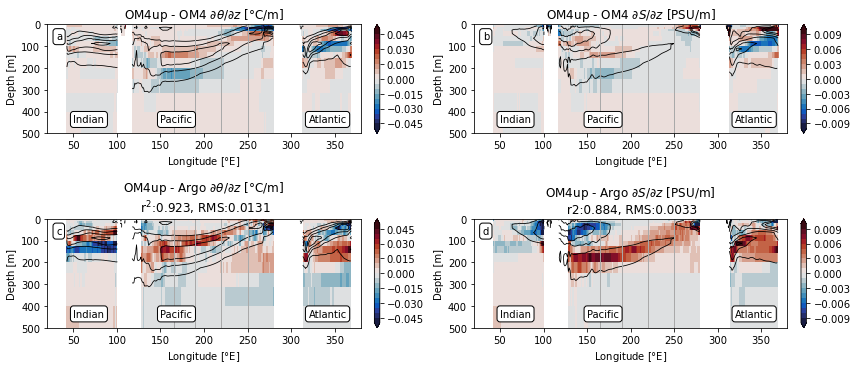

In [5]:
#### Generates Figures 15

LON = [20.,380.]
LAT= [-1.,1.]
DMax=500
YEARS=['2003-2007','2008-2012',
       '2013-2017',
      ]
Models = xr.open_dataset('/net2/bgr/Manuscripts/Tropics/Data/MOM6_Outputs.nc')

for LBL in ['OM4up',]:#'OM4-ePBLcap','OM4-KV0','CM4',]:


    Model = xr.merge([Models['T_'+LBL],Models['S_'+LBL]])
    Model = Model.rename({'T_'+LBL:'T','S_'+LBL:'S'})


    DIR = '/net2/bgr/Data/ARGO/RG_Clim/Updated/'
    T_file = 'RG_ArgoClim_Temp_Extended_200401-202010.nc'
    S_file = 'RG_ArgoClim_Psal_Extended_200401-202010.nc'
    T_hndl = xr.open_mfdataset([DIR+T_file,DIR+S_file],decode_times=False).sel(LATITUDE=slice(LAT[0],LAT[1])).mean(dim='LATITUDE')
    T_hndl['T'] = T_hndl.ARGO_TEMPERATURE_MEAN
    T_hndl['S'] = T_hndl.ARGO_SALINITY_MEAN
    T_hndl = T_hndl.assign_coords(Z=(('PRESSURE'),T_hndl.PRESSURE.values*10000/(1035*9.81)))

    grid = Grid(T_hndl, coords={'lon': {'center':'LONGITUDE'},
                                'Z': {'center':'PRESSURE'},
                               }, periodic=False)
    T_Argo = grid.transform(T_hndl.T, 'Z', Model.z_l.values, target_data=T_hndl.Z)
    S_Argo = grid.transform(T_hndl.S, 'Z', Model.z_l.values, target_data=T_hndl.Z)
    Argo = xr.merge([T_Argo,S_Argo])
    Argo = Argo.transpose('Z','LONGITUDE',...)
    XX = Model.lon.values
    XX=np.hstack((XX[0]-0.5*(XX[1]-XX[0]),0.5*(XX[1:]+XX[:-1]),XX[-1]+0.5*(XX[-1]-XX[-2])))
    ZZ = Model.z_l.values
    ZZ=np.hstack((0,0.5*(ZZ[1:]+ZZ[:-1]),ZZ[-1]+0.5*(ZZ[-1]-ZZ[-2])))

    TzM = -((Model.T.values[:-1,...]-Model.T.values[1:,...]).T/(Model.z_l.values[:-1]-Model.z_l.values[1:])).T
    TzO = -((OM4.T.values[:-1,...]-OM4.T.values[1:,...]).T/(OM4.z_l.values[:-1]-OM4.z_l.values[1:])).T
    TzA = -((Argo.T.values[:-1,...]-Argo.T.values[1:,...]).T/(Model.z_l.values[:-1]-Model.z_l.values[1:])).T
    SzM = -((Model.S.values[:-1,...]-Model.S.values[1:,...]).T/(Model.z_l.values[:-1]-Model.z_l.values[1:])).T
    SzO = -((OM4.S.values[:-1,...]-OM4.S.values[1:,...]).T/(OM4.z_l.values[:-1]-OM4.z_l.values[1:])).T
    SzA = -((Argo.S.values[:-1,...]-Argo.S.values[1:,...]).T/(Model.z_l.values[:-1]-Model.z_l.values[1:])).T

    XX = Model.lon.values
    XX=np.hstack((XX[0]-0.5*(XX[1]-XX[0]),0.5*(XX[1:]+XX[:-1]),XX[-1]+0.5*(XX[-1]-XX[-2])))
    ZZ = Model.z_l.values

    fig,ax=plt.subplots(2,2,figsize=(12,5.25))
    AX1 = ax.ravel()[0]
    AX2 = ax.ravel()[2]
    AX3 = ax.ravel()[1]
    AX4 = ax.ravel()[3]

    levels=np.linspace(0,0.2,21)
    levels_diff=np.linspace(-0.05,0.05,21)
    cmap=cmocean.cm.balance
    for AX,dpth in [[AX2,DMax]]:
        CM=AX.pcolormesh(XX,ZZ,
                         (TzM-TzA),
                        cmap=cmap,
                         norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                       )
        AX.contour(Model.lon,
                   0.5*(ZZ[:-1]+ZZ[1:]),
                   TzM,
                   levels=levels[::4],
                   colors=['k',],
                   linestyles=['-'],
                   linewidths=[0.8,],
                       )
        AX.set_ylim(dpth,0)
        AX.set_xlim(LON)
        plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
        G = np.isfinite((TzM-TzA).ravel())
        r2a = np.corrcoef(TzM.ravel()[G],TzA.ravel()[G])[0,1]**2
        rms = np.sqrt(np.mean((TzM.ravel()[G]-TzA.ravel()[G])**2))
        AX.set_title(LBL+r' - Argo $\partial \theta/\partial z$ [$\degree$C/m] '+'\n r$^2$:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))

        AX.grid(False)
        AX.set_ylabel('Depth [m]')
        AX.set_xlabel('Longitude [$\degree$E]')
        for lon in [250,220,190,165]:
            AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')
    fig.tight_layout()
    cmap=cmocean.cm.balance
    for AX,dpth in [[AX1,DMax]]:
        CM=AX.pcolormesh(XX,ZZ,
                         (TzM-TzO),
                        cmap=cmap,
                         norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                       )
        AX.contour(Model.lon,
                   0.5*(ZZ[:-1]+ZZ[1:]),
                   TzM,
                   levels=levels[::4],
                   colors=['k',],
                   linestyles=['-'],
                   linewidths=[0.8,],
                       )
        AX.set_ylim(dpth,0)
        AX.set_xlim(LON)
        plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
        AX.set_title(LBL+r' - OM4 $\partial \theta/\partial z$ [$\degree$C/m]')

        AX.grid(False)
        AX.set_ylabel('Depth [m]')
        AX.set_xlabel('Longitude [$\degree$E]')
        for lon in [250,220,190,165]:
            AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')
    fig.tight_layout()


    levels=np.linspace(-0.025,0.025,21)
    levels_diff=np.linspace(-0.01,0.01,21)
    cmap=cmocean.cm.balance
    for AX,dpth in [[AX4,DMax]]:
        CM=AX.pcolormesh(XX,ZZ,
                         (SzM-SzA),
                         cmap=cmap,
                         norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                       )
        AX.contour(Model.lon,
                   0.5*(ZZ[:-1]+ZZ[1:]),
                   SzM,
                   levels=levels[::4],
                   colors=['k',],
                   linestyles=['-'],
                   linewidths=[0.8,],
                       )
        AX.set_ylim(dpth,0)
        AX.set_xlim(LON)
        plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
        G = np.isfinite((SzM-SzA).ravel())
        r2a = np.corrcoef(SzM.ravel()[G],SzA.ravel()[G])[0,1]**2
        rms = np.sqrt(np.mean((SzM.ravel()[G]-SzA.ravel()[G])**2))
        AX.set_title(LBL+r' - Argo $\partial S/\partial z$ [PSU/m] '+'\n r2:{:4.3f}, RMS:{:5.4f}'.format(r2a,rms))
        AX.set_ylabel('Depth [m]')
        AX.set_xlabel('Longitude [$\degree$E]')
        AX.grid(False)  
        for lon in [250,220,190,165]:
            AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')  
    for AX,dpth in [[AX3,DMax]]:
        CM=AX.pcolormesh(XX,ZZ,
                         (SzM-SzO),
                         cmap=cmap,
                         norm = mpl.colors.BoundaryNorm(levels_diff, ncolors=cmap.N, clip=False)
                       )
        AX.contour(Model.lon,
                   0.5*(ZZ[:-1]+ZZ[1:]),
                   SzM,
                   levels=levels[::4],
                   colors=['k',],
                   linestyles=['-'],
                   linewidths=[0.8,],
                       )
        AX.set_ylim(dpth,0)
        AX.set_xlim(LON)
        plt.colorbar(CM,ax=AX,extend='both',fraction=0.046, pad=0.04)
        AX.set_title(LBL+r' - OM4 $\partial S/\partial z$ [PSU/m]')
        AX.set_ylabel('Depth [m]')
        AX.set_xlabel('Longitude [$\degree$E]')
        AX.grid(False)
        for lon in [250,220,190,165]:
            AX.axvline(x=lon,color='darkgray',linewidth=1,linestyle='-')
    fig.tight_layout()
    for AX,txt in [[AX1,'a'],
                   [AX3,'b'],
                   [AX2,'c'],
                   [AX4,'d'],
                  ]:
        AX.text(30,70,txt,bbox=dict(boxstyle='round', facecolor='white'))
        AX.text(50,450,'Indian',bbox=dict(boxstyle='round', facecolor='white'))
        AX.text(150,450,'Pacific',bbox=dict(boxstyle='round', facecolor='white'))
        AX.text(320,450,'Atlantic',bbox=dict(boxstyle='round', facecolor='white'))

    fig.savefig('../Fig/dTdzdSdz_diffOM4'+LBL+'.png',dpi=200,bbox_inches = "tight")